# Exercise #6 - Stable-Baselines3

In this final exercise we will use a library with implementations of various RL algorithms instead of implementing them ourselves. We will be using the [Stable-Baselines3](https://stable-baselines3.readthedocs.io/en/master/) library. It has implementations of a lot of algorithms using PyTorch, and the implementations have been tested against the original papers to make sure the results are the same.

In this exercise we will use the [PPO](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html) algorithm that is basically an upgraded Actor-Critic using multiple workers (A3C) and a smarter neural network gradient (TRPO). We will see that it converges a lot quicker on the `LunarLander-v2` environment.

Let's start with including the necessary classes and functions.

In [1]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

## Training

One of the ways to improve the efficiency of Reinforcement Learning is by using multiple parallel environments. With Stable Baselines3 that is really simple to achieve. Take a look at the [Examples page](https://stable-baselines3.readthedocs.io/en/master/guide/examples.html) for more details.

Let's create a new environment that runs 4 instances simultaneously using the [`make_vec_env`](https://stable-baselines3.readthedocs.io/en/master/common/env_util.html#stable_baselines3.common.env_util.make_vec_env) function. These vectorized environments coordinate the execution of multiple environments that run in separate processes. Make sure the `seed` parameter is set to a value (e.g. `0`), otherwise the initialization could break. The `make_vec_env` utility function will create a new vectorized environment using the `gymnasium` library we have used before.

In [2]:

### START CODE ###
env = make_vec_env('LunarLander-v2', n_envs=4, seed=0)
### END CODE ###

# Show observation shape
obs = env.reset()
obs.shape

(4, 8)

As you see the output is now a batch of 4 observations, one for each environment.

With this environment we can create a model. This model will check the observation and action spaces of the environment and configures the neural networks accordingly. We want to create a new [`PPO`](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html) instance with the `'MlpPolicy'` policy network configuration. This is a simple 'multi-layer perceptron' network, perfectly suitable for this task. Make sure `verbose` is set to `1` to show some output.

In [3]:
### START CODE ###
model = PPO('MlpPolicy', env, verbose=1)
### END CODE ###

Using cuda device


We are now ready to start training, which is done with the `learn` function of the model. Train for `200000` time steps and save the results. It should take about 5 minutes on this server.

In [4]:
### START CODE ###
# Learn the model for 200_000 steps
model.learn(total_timesteps=200_000)
### END CODE ###

model.save('lunar-ppo')

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 90.3     |
|    ep_rew_mean     | -180     |
| time/              |          |
|    fps             | 1816     |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 94.2        |
|    ep_rew_mean          | -171        |
| time/                   |             |
|    fps                  | 1306        |
|    iterations           | 2           |
|    time_elapsed         | 12          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.009842564 |
|    clip_fraction        | 0.0861      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0.000748   |
|    learning_rate        | 0.

## Evaluation

Let's take a look at the result.

First we need to import the same utility function evaluate a policy in an environment as we did in previous exercises.

In [5]:
from utils import evaluate

We want to see how well it performs with a single environment, not with a vectorized environment. So, we have to create a new environment. Let's use `gymnasium` directly.

In [6]:
import gymnasium
env = gymnasium.make('LunarLander-v2', render_mode='rgb_array')

In [7]:
def evaluate_model(model_file):
    # Load model from disk
    model = PPO.load(model_file)

    def policy(obs):
        action, _ = model.predict(obs)
        return action

    return evaluate(env, policy)

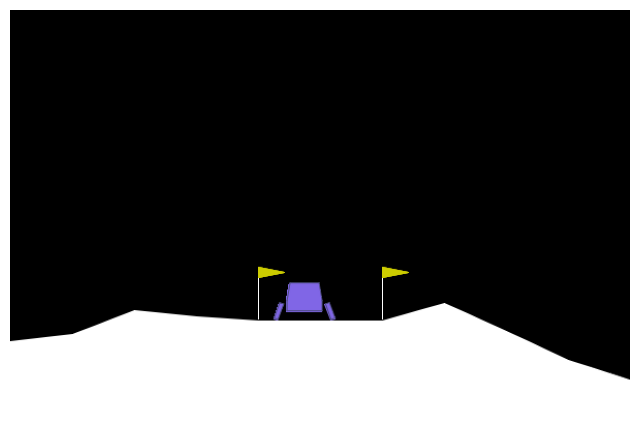

Episode length: 972, return: 232.88060905323027


(972, 232.88060905323027)

In [8]:
evaluate_model('lunar-ppo')

It should have performed quite well already, and that after only 5 minutes.

If you let it train for 1.5 million time steps with 8 environments in parallel you can achieve the following result. This took less than 20 minutes to train.

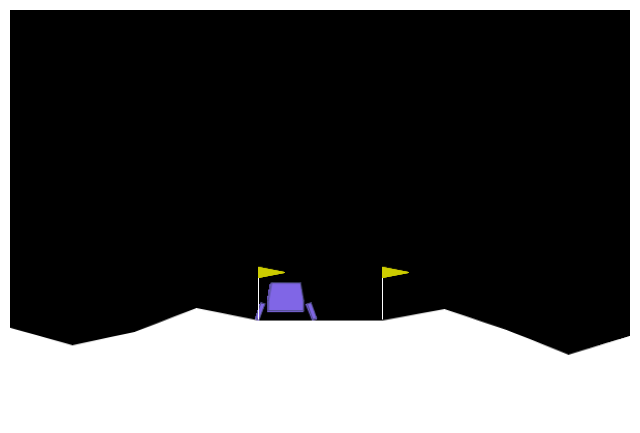

Episode length: 243, return: 238.37202805440197


(243, 238.37202805440197)

In [9]:
evaluate_model('trained/lunar-ppo')

## Conclusion

That was easy, right?

We have seen how the basic algorithms work in the previous exercises. The state-of-the-art algorithms are a bit more work to implement, but luckily these libraries allow us to use them as well with minimum effort.